In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score,r2_score,f1_score

In [2]:
data = pd.read_csv("SDN_Intrusion.csv")
pd.set_option('display.max_columns', None)

In [3]:
missing_columns = data.columns[data.isnull().any()].tolist()
missing_columns

['Flow Bytes/s']

In [4]:
print(data["Flow Bytes/s"].isnull().sum())
print((data["Flow Bytes/s"] == 0.0).sum()) 
print(np.any(np.isnan(data['Flow Bytes/s'])), np.any(np.isinf(data['Flow Bytes/s'])))

71
69640
True True


In [5]:
nan_rows = data[data["Flow Bytes/s"].isna()]

# Print row numbers (indices)
print(nan_rows.index.tolist())

[21334, 26659, 43797, 71788, 114252, 118298, 121665, 128702, 146425, 184677, 222320, 236771, 276784, 298802, 302717, 304664, 322262, 337258, 401371, 433119, 472565, 487337, 492167, 494551, 512976, 513134, 516497, 517064, 523765, 538465, 543276, 573511, 583548, 625679, 626436, 629919, 634892, 646836, 667169, 691965, 692445, 714526, 769317, 769962, 783951, 797135, 822660, 828393, 836188, 851267, 881399, 906145, 908520, 912333, 939558, 941335, 942339, 951434, 952390, 971269, 1000140, 1012458, 1013171, 1043789, 1083668, 1092930, 1133080, 1133658, 1168148, 1183097, 1183835]


In [6]:
print(data['Flow Bytes/s'][26659])

nan


In [7]:
data.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,80,9865922,5,0,30,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.040770e+00,0.506795,2.466480e+06,4.931637e+06,9863936,3,9865922,2.466480e+06,4.931637e+06,9863936,3,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,100,0,0.506795,0.000000,6,6,6.000000,0.000000,0.0000,0,0,0,0,1,0,0,0,0,7.200000,6.000000,0.000000,100,0,0,0,0,0,0,5,30,0,0,256,-1,4,20,1986.00000,0.0000,1986,1986,9.863936e+06,0.00000,9863936,9863936,DDoS
1,1,443,158423,24,22,703,24564,453,0,29.291667,96.131015,1418,0,1116.545455,567.343411,1.594907e+05,290.361879,3.520511e+03,1.047538e+04,37159,1,158423,6.887957e+03,1.415714e+04,37690,1,120711,5.748143e+03,1.324188e+04,39172,1,0,0,0,0,780,712,151.493154,138.868725,0,1418,537.595745,673.020113,452956.0722,0,0,0,1,0,0,0,0,0,549.282609,29.291667,1116.545455,780,0,0,0,0,0,0,24,703,22,24564,65535,349,5,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,2,443,61163904,14,12,993,3445,620,0,70.928571,167.601388,2713,0,287.083333,785.649755,7.255914e+01,0.425087,2.446556e+06,4.340629e+06,10100000,63,61200000,4.704916e+06,5.184732e+06,10100000,4140,61100000,5.552628e+06,5.235244e+06,10100000,2482,0,0,0,0,292,324,0.228893,0.196194,0,2713,164.370370,536.542790,287878.1652,0,0,0,1,0,0,0,0,0,170.692308,70.928571,287.083333,292,0,0,0,0,0,0,14,993,12,3445,8192,115,13,20,147216.66670,152989.5108,459505,84515,1.000000e+07,21747.04690,10100000,9999779,BENIGN
3,3,443,110544045,18,18,1213,4216,812,0,67.388889,192.927032,1460,0,234.222222,476.957460,4.911165e+01,0.325662,3.158401e+06,4.679805e+06,10000000,19,111000000,6.500518e+06,4.889088e+06,10000000,25544,111000000,6.500517e+06,4.893360e+06,10000000,219,0,0,0,0,384,504,0.162831,0.162831,0,1460,146.729730,364.107939,132574.5916,0,0,0,1,0,0,0,0,1,150.805556,67.388889,234.222222,384,0,0,0,0,0,0,18,1213,18,4216,8192,63,16,20,75305.72727,133115.4997,476664,35046,9.970950e+06,80601.91884,10000000,9728297,BENIGN
4,4,53,185,2,2,104,136,52,52,52.000000,0.000000,68,68,68.000000,0.000000,1.297297e+06,21621.621620,6.166667e+01,6.591914e+01,133,3,3,3.000000e+00,0.000000e+00,3,3,49,4.900000e+01,0.000000e+00,49,49,0,0,0,0,40,40,10810.810810,10810.810810,52,68,58.400000,8.763561,76.8000,0,0,0,0,0,0,0,0,1,73.000000,52.000000,68.000000,40,0,0,0,0,0,0,2,104,2,136,-1,-1,1,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN


In [8]:
data['Flow Bytes/s'] = data['Flow Bytes/s'].replace(np.inf,np.nan)

In [9]:
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].mean())

In [10]:
print(data['Flow Bytes/s'][21334])

1100621.0466332133


In [11]:
data['Class'].unique()

array(['DDoS', 'BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

In [12]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
BENIGN                        798322
DDoS                          383439
Web Attack � Brute Force        4550
Web Attack � XSS                1962
Web Attack � Sql Injection        60
Name: count, dtype: int64


In [13]:
data_encoded = pd.get_dummies(data, columns=['Class'], drop_first=True) #data_encoded contains whole datset with new columns

In [14]:
data_encoded.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class_DDoS,Class_Web Attack � Brute Force,Class_Web Attack � Sql Injection,Class_Web Attack � XSS
0,0,80,9865922,5,0,30,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.040770e+00,0.506795,2.466480e+06,4.931637e+06,9863936,3,9865922,2.466480e+06,4.931637e+06,9863936,3,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,100,0,0.506795,0.000000,6,6,6.000000,0.000000,0.0000,0,0,0,0,1,0,0,0,0,7.200000,6.000000,0.000000,100,0,0,0,0,0,0,5,30,0,0,256,-1,4,20,1986.00000,0.0000,1986,1986,9.863936e+06,0.00000,9863936,9863936,True,False,False,False
1,1,443,158423,24,22,703,24564,453,0,29.291667,96.131015,1418,0,1116.545455,567.343411,1.594907e+05,290.361879,3.520511e+03,1.047538e+04,37159,1,158423,6.887957e+03,1.415714e+04,37690,1,120711,5.748143e+03,1.324188e+04,39172,1,0,0,0,0,780,712,151.493154,138.868725,0,1418,537.595745,673.020113,452956.0722,0,0,0,1,0,0,0,0,0,549.282609,29.291667,1116.545455,780,0,0,0,0,0,0,24,703,22,24564,65535,349,5,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,False,False,False,False
2,2,443,61163904,14,12,993,3445,620,0,70.928571,167.601388,2713,0,287.083333,785.649755,7.255914e+01,0.425087,2.446556e+06,4.340629e+06,10100000,63,61200000,4.704916e+06,5.184732e+06,10100000,4140,61100000,5.552628e+06,5.235244e+06,10100000,2482,0,0,0,0,292,324,0.228893,0.196194,0,2713,164.370370,536.542790,287878.1652,0,0,0,1,0,0,0,0,0,170.692308,70.928571,287.083333,292,0,0,0,0,0,0,14,993,12,3445,8192,115,13,20,147216.66670,152989.5108,459505,84515,1.000000e+07,21747.04690,10100000,9999779,False,False,False,False
3,3,443,110544045,18,18,1213,4216,812,0,67.388889,192.927032,1460,0,234.222222,476.957460,4.911165e+01,0.325662,3.158401e+06,4.679805e+06,10000000,19,111000000,6.500518e+06,4.889088e+06,10000000,25544,111000000,6.500517e+06,4.893360e+06,10000000,219,0,0,0,0,384,504,0.162831,0.162831,0,1460,146.729730,364.107939,132574.5916,0,0,0,1,0,0,0,0,1,150.805556,67.388889,234.222222,384,0,0,0,0,0,0,18,1213,18,4216,8192,63,16,20,75305.72727,133115.4997,476664,35046,9.970950e+06,80601.91884,10000000,9728297,False,False,False,False
4,4,53,185,2,2,104,136,52,52,52.000000,0.000000,68,68,68.000000,0.000000,1.297297e+06,21621.621620,6.166667e+01,6.591914e+01,133,3,3,3.000000e+00,0.000000e+00,3,3,49,4.900000e+01,0.000000e+00,49,49,0,0,0,0,40,40,10810.810810,10810.810810,52,68,58.400000,8.763561,76.8000,0,0,0,0,0,0,0,0,1,73.000000,52.000000,68.000000,40,0,0,0,0,0,0,2,104,2,136,-1,-1,1,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X= data.drop('Class',axis = 1)
y = data_encoded[['Class_DDoS','Class_Web Attack � Brute Force','Class_Web Attack � Sql Injection','Class_Web Attack � XSS']]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y )

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
print(np.any(np.isnan(X_train)), np.any(np.isinf(X_train)))
print(np.any(np.isnan(X_test)), np.any(np.isinf(X_test)))

False True
False True


In [20]:
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Replace NaNs (which were originally 'inf') with max finite value
X_train = np.nan_to_num(X_train, nan=np.nanmax(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmax(X_test))


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [22]:
#KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3) ## value of k is 5 means it will check 5 nearest neighbor
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)     

In [25]:
accuracy_score(y_test,y_pred_knn)

0.996109396914446

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree with class weights to handle class imbalance
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.3f}")

# Generate classification report with zero_division handling
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
print(classification_report(y_test, y_pred_dt,zero_division=0))


Decision Tree:
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115032
           1       0.94      0.93      0.93      1365
           2       0.93      0.78      0.85        18
           3       0.83      0.86      0.84       588

   micro avg       1.00      1.00      1.00    117003
   macro avg       0.93      0.89      0.91    117003
weighted avg       1.00      1.00      1.00    117003
 samples avg       0.33      0.33      0.33    117003



In [27]:
## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Convert y_train and y_test from one-hot encoding to single-class labels
y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_labels)

# Predict
y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test_labels, y_pred_nb)
# Evaluate
print("Naïve Bayes Accuracy:", accuracy_score(y_test_labels, y_pred_nb))
report_nb  = classification_report(y_test_labels, y_pred_nb,output_dict = True)
print(classification_report(y_test_labels, y_pred_nb))

Naïve Bayes Accuracy: 0.9897447405329594
                                  precision    recall  f1-score   support

                      Class_DDoS       1.00      0.99      1.00    354529
  Class_Web Attack � Brute Force       0.06      0.10      0.07      1365
Class_Web Attack � Sql Injection       0.10      1.00      0.18        18
          Class_Web Attack � XSS       0.33      0.92      0.48       588

                        accuracy                           0.99    356500
                       macro avg       0.37      0.75      0.43    356500
                    weighted avg       1.00      0.99      0.99    356500



In [29]:
#comparison

In [30]:

models = ['Decision Tree', 'Naive Bayes']
accuracies = [accuracy_dt, accuracy_nb]

# Print comparison
for i in range(len(models)):
    print(f"{models[i]} -> Accuracy: {accuracies[i]:.3f}")

Decision Tree -> Accuracy: 0.999
Naive Bayes -> Accuracy: 0.990


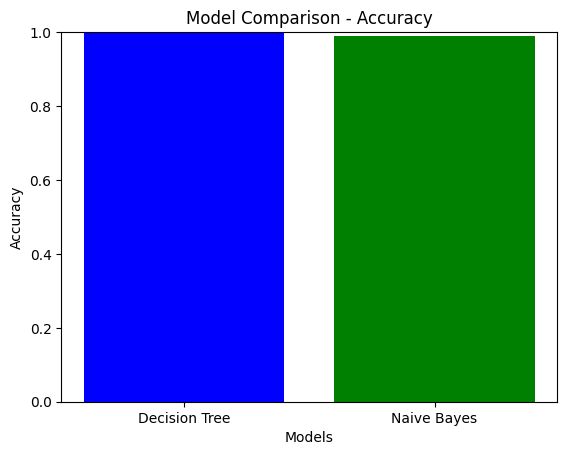

In [31]:
import matplotlib.pyplot as plt

# Bar chart for accuracy comparison
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [32]:
metrics = {
    "Model": ["Decision Tree", "Naive Bayes"],
    "Precision": [report_dt['weighted avg']['precision'], report_nb['weighted avg']['precision']],
    "Recall": [report_dt['weighted avg']['recall'], report_nb['weighted avg']['recall']],
    "F1-Score": [report_dt['weighted avg']['f1-score'], report_nb['weighted avg']['f1-score']],
}

In [33]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Model  Precision    Recall  F1-Score
0  Decision Tree   0.998394  0.998350   0.99837
1    Naive Bayes   0.995176  0.989745   0.99217


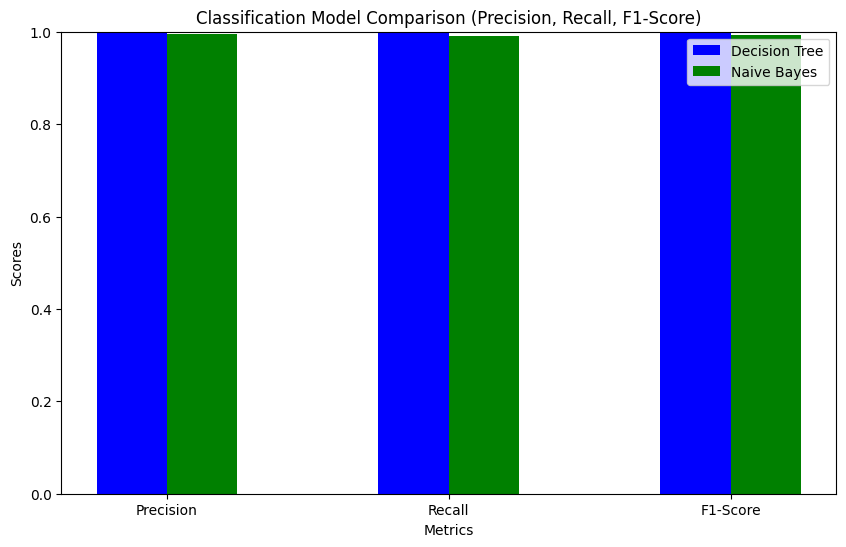

In [34]:
plt.figure(figsize=(10,6))

metrics = ["Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))  # [0,1,2]
bar_width = 0.25

plt.bar(x - bar_width/2, metrics_df.loc[0, metrics], width=bar_width, label="Decision Tree", color="blue")
plt.bar(x + bar_width/2, metrics_df.loc[1, metrics], width=bar_width, label="Naive Bayes", color="green")

# Customize chart
plt.title("Classification Model Comparison (Precision, Recall, F1-Score)")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metrics)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()

# Show the plot
plt.show()
